# STA 208: Homework 4 (Do not distribute)

__Instructions:__ Submit it on canvas.  The canvas should include all of your code either in this notebook file, or a separate python file that is imported and ran in this notebook.  We should be able to open this notebook and run everything here by running the cells in sequence.  The written portions can be either done in markdown and TeX in new cells or written clearly by hand when you hand it in.

- Code should be well organized and documented
- All math should be clear and make sense sequentially
- When in doubt explain what is going on
- You will be graded on correctness of your math, code efficiency and succinctness, and conclusions and modelling decisions

__Exercise 1__ (30 pts)

Recall that a Mercer kernel is a similarity function $k(x,x')$ such that the matrix $K_{ij} = ( k(x_i,x_j) )_{ij}$ is positive semidefinite regardless of dataset $\{x_i\}_{i=1}^n \subset \mathbb R^p$.


1. (6 pts) Suppose that the spectral decomposition of $K$ is $K = U \Lambda U^\top$ where $U$ is $n \times n$ and $\Lambda$ is diagonal.  What do we know about $\Lambda$ and why?

1. (9 pts) Consider ridge regression with objective,
$$
\min_{\beta \in \ell_2} \frac 12 \sum_{i=1}^n ( y_i - \Phi(x_i)^\top \beta )^2 + \lambda \| \beta\|_2^2.
$$
rewrite the above as an optimization over $\alpha \in \mathbb R^n$ using the kernel trick (this gives you kernel ridge regression).

1. (6 pts) Suppose that the kernel matrix has spectral decomposition $K = U \Lambda U^\top$.  Write the solution to the kernel ridge regression as a function of $\Lambda, U, y$.  What does this tell you about the effect of the eigenvalues on the solution (suppose that you only increase one of the eigenvalues).

1. (9 pts) Check if the following notions of similarity are Mercer kernels,
 1. $k(x,x') = x^\top x'$
 1. $k(x,x') = x_1 x'_1 - x_2 x_2', \quad x, x' \in \mathbb R^2$ 
 1. $k(s,s') = 1\{s,s' \textrm{ have the same sentence structure}\}$ where the sentence structure is the sequence of parts-of-speech for each word/phrase.  For example, "The cat ran around the house." is "noun verb preposition noun" has the same structure as "Steve forgot about the homework".

**1.1**

$\Lambda$ is the diagonal matrix whose diagonal elements are the corresponding eigenvalues of $K$. Since $K$ is positive semidefinite, all the eigenvalues are nonnegative.

**1.2**

Let $z_i = \Phi(x_i)$. $\hat \beta$ can be written as $Z^\top \alpha$ 

$K = Z Z^\top$

\begin{align}
& \quad min_{\beta \in \ell_2} \frac 12 \sum_{i=1}^n ( y_i - \Phi(x_i)^\top \beta )^2 + \lambda \| \beta\|_2^2. \\
&= min_{\alpha \in R_n} \frac 12 \sum_{i=1}^n ( y_i - \Phi(x_i)^\top Z^\top \alpha )^2 + \lambda \| Z^\top \alpha\|_2^2. \\
&= min_{\alpha \in R_n} \frac 12 \sum_{i=1}^n ( y_i - z_i^\top Z^\top \alpha )^2 + \lambda \| Z^\top \alpha\|_2^2. \\
&= min_{\alpha \in R_n} \frac 12 \| y - Z Z^\top \alpha\|_2^2 + \lambda \| Z^\top \alpha\|_2^2. \\
&= min_{\alpha \in R_n} \frac 12 \| y - K \alpha\|_2^2 + \lambda \alpha^\top K \alpha \\
\end{align}

**1.3**

$\frac{\partial L}{\partial \alpha} = -K^\top (y - K\alpha) + 2\lambda K \alpha$

$\alpha^* = (K^\top K + 2\lambda K)^{-1} K^\top y = (U \Lambda^{2}U^\top + 2\lambda  U\Lambda U^\top)^{-1}U \Lambda U^\top y = U(\Lambda+2\lambda I)^{-1}U^\top y$ 

It can be seen that the time complexity depend on the number of nonnegative eigenvalues. 

**1.4**

A. Yes.

$K_{ij} = x_i^\top x_j$, $K = XX^\top$, then for any $w \in R_n$, $w^\top K w = w^\top X X^\top w = \|X^\top w\|_2^2 \ge 0 $

B. No. 

$K_{ij} = (x_i^\top \ x_j^\top)
\left[
 \begin{matrix}
   1 & 0 \\
   0 & -1
 \end{matrix}
\right]
(x_i \ x_j)^\top
$

For any $w \in R_n$, $w^\top K w = \sum_{ij} w_i w_j K_{ij}$. 

$\left[
 \begin{matrix}
   1 & 0 \\
   0 & -1
 \end{matrix}
\right]$ is not positive semidefinite. $w^\top K w$ could be smaller than 0.

C. Yes.

For any $w \in R_n$,

\begin{align}
w^\top K w &= \sum_{ij}w_i 1\{s_i,𝑠_j\ have\ the\ same\ sentence\ structure\} w_j \\
&= \sum_i w_i^2 + \sum_{\{s_i,s_j\ have\ the\ same\ sentence\ structure\}} 2 w_i w_j \\
&= \sum_{\{s_i,s_j\ have\ the\ same\ sentence\ structure\}} (w_i + w_j)^2 + \sum_{\{s_k\ does\ not\ have\ the\ same\ sentence\ structure\ with\ any\ others\}} w_k^2 \\
&\ge 0
\end{align}

__Exercise 2__ (30 pts)

Load the poses.csv dataset, which is a concatenation of other datasets to form a larger dataset.  I want you to act like the dataset is from the same experiment. 

1. (15 pts) Apply 1 time lag difference of the dataset, so that each variable is the difference of the time point and the previous time point.  Standardize the dataset and remove any variables that do not make sense.  Run the PCA decomposition with 2 principal components.  Plot the 2 principal components.  Which variables have the most loading on the principal components (look at `.components_`)?

1. (15 pts) Also on the 1 lagged dataset.  Run K-means clustering (with 6 clusters), how much does the cluster overlap with the 'task' variable.  Look at the confusion matrix of the cluster against the 'task'.  Is there a clear mapping from clusters to task?

**2.1**

In [1]:
import pandas as pd
import numpy as np
import plotnine as p9
from matplotlib import pyplot as plt

In [3]:
poses = pd.read_csv('poses.csv')

In [4]:
poses

,Unnamed: 0,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,task,filename
0,0,0,42.00,0.00,11.50,4.56,18.50,0.87,sitting,dataset14.csv
1,1,250,41.75,0.43,21.50,1.80,11.75,1.48,sitting,dataset14.csv
2,2,500,41.67,0.47,9.33,5.44,12.00,2.83,sitting,dataset14.csv
3,3,750,40.00,0.82,12.67,0.94,17.75,1.09,sitting,dataset14.csv
4,4,1000,40.25,0.83,12.25,0.43,18.25,0.43,sitting,dataset14.csv
...,...,...,...,...,...,...,...,...,...,...
42234,475,118750,43.00,0.71,9.50,2.18,30.25,0.43,bending1,dataset2.csv
42235,476,119000,43.25,0.83,12.25,0.43,32.50,0.50,bending1,dataset2.csv
42236,477,119250,43.50,0.50,13.00,2.35,32.50,0.87,bending1,dataset2.csv
42237,478,119500,43.75,0.43,15.75,1.92,31.50,0.50,bending1,dataset2.csv


In [5]:
poses_lag = poses.iloc[:,2:8].shift(-1) - poses.iloc[:,2:8]
poses_lag = poses_lag.iloc[:-1,:]

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
std = StandardScaler()
poses_lag_std = std.fit_transform(poses_lag)

In [8]:
poses_lag_std = pd.concat([pd.DataFrame(poses_lag_std), poses['task']], axis=1)

In [9]:
poses_lag_std = poses_lag_std.dropna()

In [10]:
pca = PCA(n_components=2)
poses_lag_pca = pca.fit_transform(poses_lag_std.iloc[:,0:-1])

In [11]:
pca.components_

array([[-0.13480886, -0.23718976,  0.5917033 , -0.58569015,  0.35242783,
        -0.32896271],
       [ 0.09513682, -0.10693026,  0.34541383, -0.33968333, -0.6124054 ,
         0.60809461]])

It can be seen that 'avg_rss13' has the most loading for pca_1, and 'avg_rss23' has the most loading for pca_2.

In [12]:
poses_lag_pca = pd.DataFrame(poses_lag_pca, columns=['pca_1', 'pca_2'])

In [14]:
poses_lag_pca['task'] = list(poses_lag_std['task'])

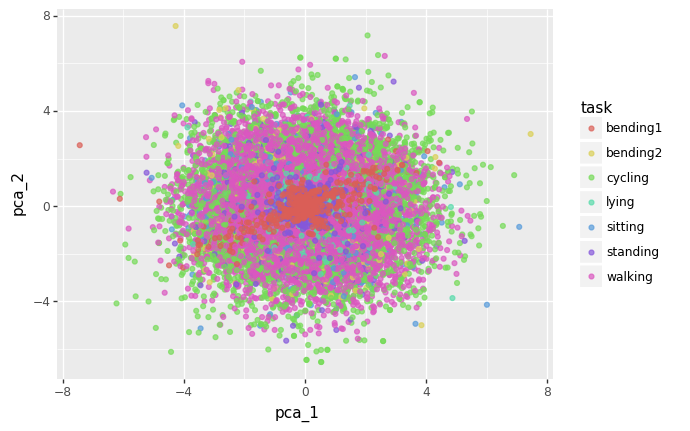

<ggplot: (-9223371912045248533)>

In [16]:
p9.ggplot(poses_lag_pca, p9.aes('pca_1', 'pca_2', color = 'task')) + p9.geom_point(alpha = 0.7)

**2.2**

In [17]:
from sklearn.cluster import KMeans

In [18]:
kmean = KMeans(n_clusters=7)
clust = kmean.fit(poses_lag_std.iloc[:,0:-1])

In [19]:
import collections
collections.Counter(clust.labels_)

Counter({6: 3211, 2: 3125, 4: 25836, 0: 2686, 1: 2874, 5: 1937, 3: 2088})

In [20]:
poses_lag_std['task'].value_counts()

lying       7200
walking     7200
cycling     7200
sitting     7199
standing    7199
bending1    3359
bending2    2400
Name: task, dtype: int64

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

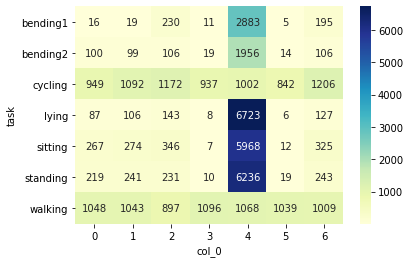

In [22]:
sns.heatmap(pd.crosstab(poses_lag_std['task'], clust.labels_), annot=True, fmt="d", cmap="YlGnBu")

25836 samples are predicted to cluster '4'. Additionally, from the table above ($C_{ij}$ is the number of samples in true class $i$ and in predicted class $j$), there is not a clear mapping from clusters to task.

__Exercise 3__ (30 pts)

To introduce a simple neural network and learn some tensorflow we will use the following simulated dataset.  Throughout feel free to use the keras API, optimizers, etc.  You should only need to train this using the CPU.

In [23]:
import numpy as np
import pandas as pd
import plotnine as p9

In [24]:
n = 10000
X = np.random.uniform(0,1,(n,2))
p = 1 / (1 + np.exp(-5*(X.sum(axis=1) - 2.* (X[:,0] * X[:,1] > .25) - .5)))
y = np.random.uniform(0,1,n) < p

In [25]:
XOR_data = pd.DataFrame(X,columns=['X0','X1'])
XOR_data['p'] = p

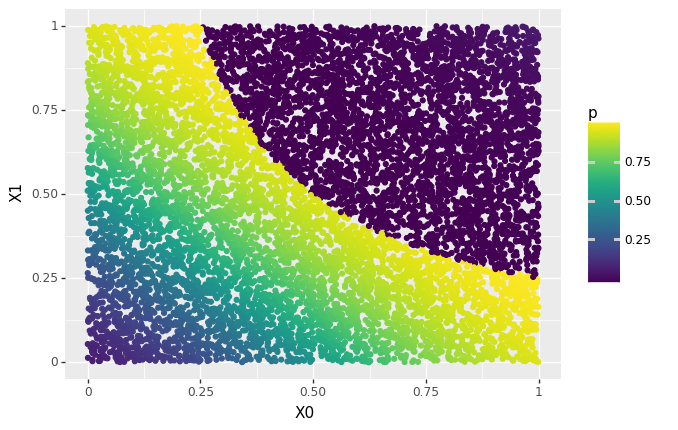

<ggplot: (124810498098)>

In [26]:
p9.ggplot(XOR_data,p9.aes(x='X0',y='X1',color='p')) + p9.geom_point()

Create a neural net with dense hidden layers (including intercepts for each hidden unit) and logistic loss function.  Train it on the above dataset with 2 dimensional input using Adam and 32 minibatch size.  You may want to increase the number of iterations until you see convergence.  You can assess visually by plotting the predictions and comparing to the true probability.

1. (10 pts) Try ReLu activation as well as sigmoid activation for 1 hidden layer and 3 units.
2. (10 pts) Try ReLu activation with 2 hidden layers and 3 units each.
3. (10 pts) Try (2) but with any combination of ReLu and Sigmoid activation.

In [27]:
y_ = 1*y

In [28]:
pd.Series(y_).value_counts()

0    5782
1    4218
dtype: int64

In [29]:
from tensorflow import keras

In [30]:
def plot_history(nn):
    plt.plot(nn.history['loss'], label = 'loss')
    plt.plot(nn.history['sparse_categorical_accuracy'], label = 'accuracy')
    plt.xlabel('Epoch')
    plt.legend()

In [31]:
def plot_proba(model):
    pred_ = model.predict_proba(np.array(XOR_data[['X0','X1']]))[:,1]
    p = p9.ggplot(XOR_data,p9.aes(x='X0',y='X1',color=pred_)) + p9.geom_point() + p9.labs(color = 'predicted probability')
    return p

From the plots below, the predition results of model 3 (ReLu activation with 2 hidden layers and 3 units each) is very close to the true probability.

**3.1**

Sigmoid activation for 1 hidden layer and 3 units

In [32]:
model1 = keras.Sequential()
model1.add(keras.layers.Dense(3, input_dim = 2, activation = 'sigmoid'))
model1.add(keras.layers.Dense(2, activation = 'softmax'))
opt = keras.optimizers.Adam()
model1.compile(loss = keras.losses.SparseCategoricalCrossentropy(), 
              optimizer = opt,
              metrics = [keras.metrics.SparseCategoricalAccuracy()])

In [33]:
nn1 = model1.fit(x = np.array(XOR_data[['X0','X1']]),  y= y_, 
               batch_size = 32, epochs = 250)

Train on 10000 samples
Epoch 1/250
10000/10000 [==============================] - 1s 102us/sample - loss: 0.6773 - sparse_categorical_accuracy: 0.5782
Epoch 2/250
10000/10000 [==============================] - 0s 36us/sample - loss: 0.6705 - sparse_categorical_accuracy: 0.5782
Epoch 3/250
10000/10000 [==============================] - 0s 38us/sample - loss: 0.6640 - sparse_categorical_accuracy: 0.5782
Epoch 4/250
10000/10000 [==============================] - 0s 35us/sample - loss: 0.6574 - sparse_categorical_accuracy: 0.5744
Epoch 5/250
10000/10000 [==============================] - 0s 36us/sample - loss: 0.6508 - sparse_categorical_accuracy: 0.5500
Epoch 6/250
10000/10000 [==============================] - 0s 38us/sample - loss: 0.6442 - sparse_categorical_accuracy: 0.5395
Epoch 7/250
10000/10000 [==============================] - 0s 36us/sample - loss: 0.6380 - sparse_categorical_accuracy: 0.5455
Epoch 8/250
10000/10000 [==============================] - 0s 37us/sample - loss: 0.632

10000/10000 [==============================] - 0s 38us/sample - loss: 0.5812 - sparse_categorical_accuracy: 0.6557
Epoch 65/250
10000/10000 [==============================] - 0s 40us/sample - loss: 0.5804 - sparse_categorical_accuracy: 0.6565
Epoch 66/250
10000/10000 [==============================] - 0s 34us/sample - loss: 0.5796 - sparse_categorical_accuracy: 0.6619
Epoch 67/250
10000/10000 [==============================] - 0s 35us/sample - loss: 0.5788 - sparse_categorical_accuracy: 0.6604
Epoch 68/250
10000/10000 [==============================] - 0s 37us/sample - loss: 0.5779 - sparse_categorical_accuracy: 0.6634
Epoch 69/250
10000/10000 [==============================] - 0s 35us/sample - loss: 0.5771 - sparse_categorical_accuracy: 0.6633
Epoch 70/250
10000/10000 [==============================] - 0s 35us/sample - loss: 0.5763 - sparse_categorical_accuracy: 0.6663
Epoch 71/250
10000/10000 [==============================] - 0s 38us/sample - loss: 0.5756 - sparse_categorical_accura

10000/10000 [==============================] - 0s 34us/sample - loss: 0.5289 - sparse_categorical_accuracy: 0.7266
Epoch 128/250
10000/10000 [==============================] - 0s 34us/sample - loss: 0.5279 - sparse_categorical_accuracy: 0.7214
Epoch 129/250
10000/10000 [==============================] - 0s 34us/sample - loss: 0.5273 - sparse_categorical_accuracy: 0.7277
Epoch 130/250
10000/10000 [==============================] - 0s 35us/sample - loss: 0.5265 - sparse_categorical_accuracy: 0.7322
Epoch 131/250
10000/10000 [==============================] - 0s 33us/sample - loss: 0.5257 - sparse_categorical_accuracy: 0.7291
Epoch 132/250
10000/10000 [==============================] - 0s 34us/sample - loss: 0.5249 - sparse_categorical_accuracy: 0.7298
Epoch 133/250
10000/10000 [==============================] - 0s 36us/sample - loss: 0.5241 - sparse_categorical_accuracy: 0.7335
Epoch 134/250
10000/10000 [==============================] - 0s 33us/sample - loss: 0.5234 - sparse_categorical

10000/10000 [==============================] - 0s 34us/sample - loss: 0.4131 - sparse_categorical_accuracy: 0.8116
Epoch 191/250
10000/10000 [==============================] - 0s 35us/sample - loss: 0.4127 - sparse_categorical_accuracy: 0.8102
Epoch 192/250
10000/10000 [==============================] - 0s 34us/sample - loss: 0.4124 - sparse_categorical_accuracy: 0.8111
Epoch 193/250
10000/10000 [==============================] - 0s 35us/sample - loss: 0.4121 - sparse_categorical_accuracy: 0.8100
Epoch 194/250
10000/10000 [==============================] - 0s 34us/sample - loss: 0.4121 - sparse_categorical_accuracy: 0.8096
Epoch 195/250
10000/10000 [==============================] - 0s 36us/sample - loss: 0.4117 - sparse_categorical_accuracy: 0.8101
Epoch 196/250
10000/10000 [==============================] - 0s 34us/sample - loss: 0.4114 - sparse_categorical_accuracy: 0.8112
Epoch 197/250
10000/10000 [==============================] - 0s 33us/sample - loss: 0.4112 - sparse_categorical

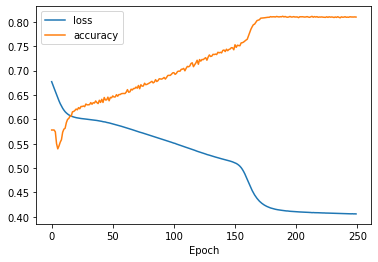

In [34]:
plot_history(nn1)

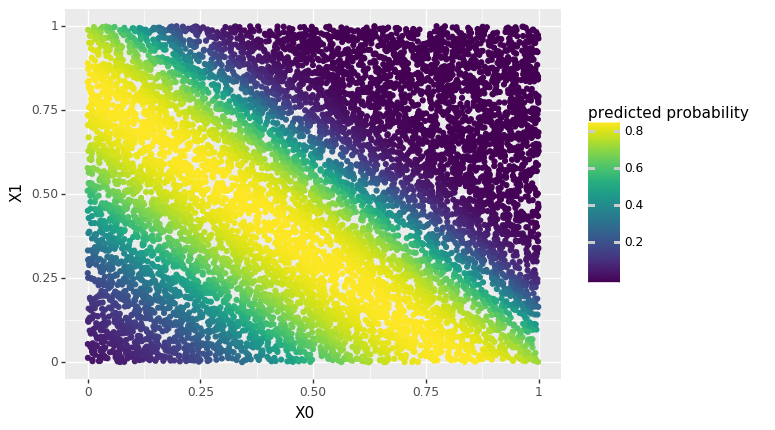

<ggplot: (-9223371912043364464)>

In [35]:
plot_proba(model1)

Relu activation for 1 hidden layer and 3 units

In [39]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(3, input_dim = 2, activation = 'relu'))
model2.add(keras.layers.Dense(2, activation = 'softmax'))
opt = keras.optimizers.Adam()
model2.compile(loss = keras.losses.SparseCategoricalCrossentropy(), 
              optimizer = opt,
              metrics = [keras.metrics.SparseCategoricalAccuracy()])

In [40]:
nn2 = model2.fit(x = np.array(XOR_data[['X0','X1']]),  y= y_, 
               batch_size = 32, epochs = 100)

Train on 10000 samples
Epoch 1/100
10000/10000 [==============================] - 1s 70us/sample - loss: 0.7406 - sparse_categorical_accuracy: 0.4643
Epoch 2/100
10000/10000 [==============================] - 0s 38us/sample - loss: 0.6761 - sparse_categorical_accuracy: 0.5782
Epoch 3/100
10000/10000 [==============================] - 0s 35us/sample - loss: 0.6549 - sparse_categorical_accuracy: 0.5744
Epoch 4/100
10000/10000 [==============================] - 0s 42us/sample - loss: 0.6362 - sparse_categorical_accuracy: 0.5394
Epoch 5/100
10000/10000 [==============================] - 1s 52us/sample - loss: 0.6169 - sparse_categorical_accuracy: 0.5591
Epoch 6/100
10000/10000 [==============================] - 1s 54us/sample - loss: 0.5943 - sparse_categorical_accuracy: 0.6129
Epoch 7/100
10000/10000 [==============================] - 1s 66us/sample - loss: 0.5699 - sparse_categorical_accuracy: 0.6473
Epoch 8/100
10000/10000 [==============================] - 1s 79us/sample - loss: 0.5480

10000/10000 [==============================] - 0s 36us/sample - loss: 0.4012 - sparse_categorical_accuracy: 0.8100
Epoch 65/100
10000/10000 [==============================] - 0s 37us/sample - loss: 0.4014 - sparse_categorical_accuracy: 0.8099
Epoch 66/100
10000/10000 [==============================] - 0s 35us/sample - loss: 0.4014 - sparse_categorical_accuracy: 0.8103
Epoch 67/100
10000/10000 [==============================] - 0s 33us/sample - loss: 0.4014 - sparse_categorical_accuracy: 0.8107
Epoch 68/100
10000/10000 [==============================] - 0s 36us/sample - loss: 0.4013 - sparse_categorical_accuracy: 0.8098
Epoch 69/100
10000/10000 [==============================] - 0s 33us/sample - loss: 0.4014 - sparse_categorical_accuracy: 0.8103
Epoch 70/100
10000/10000 [==============================] - 0s 36us/sample - loss: 0.4012 - sparse_categorical_accuracy: 0.8101
Epoch 71/100
10000/10000 [==============================] - 0s 35us/sample - loss: 0.4011 - sparse_categorical_accura

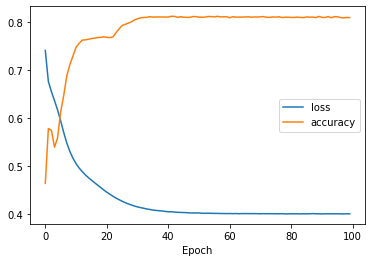

In [41]:
plot_history(nn2)

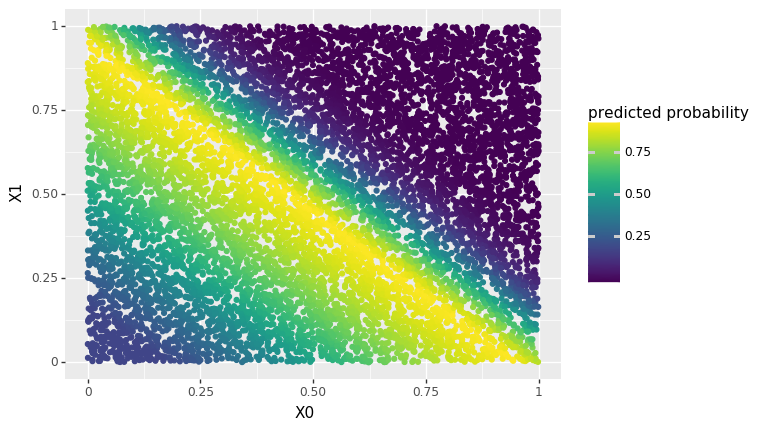

<ggplot: (124811620195)>

In [42]:
plot_proba(model2)

**3.2**

ReLu activation with 2 hidden layers and 3 units each

In [43]:
model3 = keras.Sequential()
model3.add(keras.layers.Dense(3, input_dim = 2, activation = 'relu'))
model3.add(keras.layers.Dense(3, activation = 'relu'))
model3.add(keras.layers.Dense(2, activation = 'softmax'))
opt = keras.optimizers.Adam()
model3.compile(loss = keras.losses.SparseCategoricalCrossentropy(), 
              optimizer = opt,
              metrics = [keras.metrics.SparseCategoricalAccuracy()])

In [44]:
nn3 = model3.fit(x = np.array(XOR_data[['X0','X1']]),  y= y_, 
               batch_size = 32, epochs = 100)

Train on 10000 samples
Epoch 1/100
10000/10000 [==============================] - 1s 67us/sample - loss: 0.6674 - sparse_categorical_accuracy: 0.5631
Epoch 2/100
10000/10000 [==============================] - 0s 38us/sample - loss: 0.6172 - sparse_categorical_accuracy: 0.5797
Epoch 3/100
10000/10000 [==============================] - 0s 39us/sample - loss: 0.5537 - sparse_categorical_accuracy: 0.7047
Epoch 4/100
10000/10000 [==============================] - 0s 36us/sample - loss: 0.4978 - sparse_categorical_accuracy: 0.7713
Epoch 5/100
10000/10000 [==============================] - 0s 38us/sample - loss: 0.4552 - sparse_categorical_accuracy: 0.8039
Epoch 6/100
10000/10000 [==============================] - 0s 40us/sample - loss: 0.4254 - sparse_categorical_accuracy: 0.8195
Epoch 7/100
10000/10000 [==============================] - 0s 40us/sample - loss: 0.4051 - sparse_categorical_accuracy: 0.8256
Epoch 8/100
10000/10000 [==============================] - 0s 37us/sample - loss: 0.3914

10000/10000 [==============================] - 0s 40us/sample - loss: 0.3431 - sparse_categorical_accuracy: 0.8571
Epoch 65/100
10000/10000 [==============================] - 0s 36us/sample - loss: 0.3430 - sparse_categorical_accuracy: 0.8566
Epoch 66/100
10000/10000 [==============================] - 0s 36us/sample - loss: 0.3429 - sparse_categorical_accuracy: 0.8570
Epoch 67/100
10000/10000 [==============================] - 0s 39us/sample - loss: 0.3428 - sparse_categorical_accuracy: 0.8572
Epoch 68/100
10000/10000 [==============================] - 0s 36us/sample - loss: 0.3430 - sparse_categorical_accuracy: 0.8580
Epoch 69/100
10000/10000 [==============================] - 0s 35us/sample - loss: 0.3431 - sparse_categorical_accuracy: 0.8565
Epoch 70/100
10000/10000 [==============================] - 0s 39us/sample - loss: 0.3429 - sparse_categorical_accuracy: 0.8575
Epoch 71/100
10000/10000 [==============================] - 0s 36us/sample - loss: 0.3427 - sparse_categorical_accura

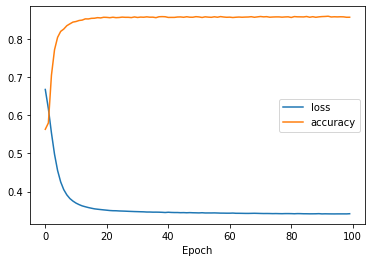

In [45]:
plot_history(nn3)

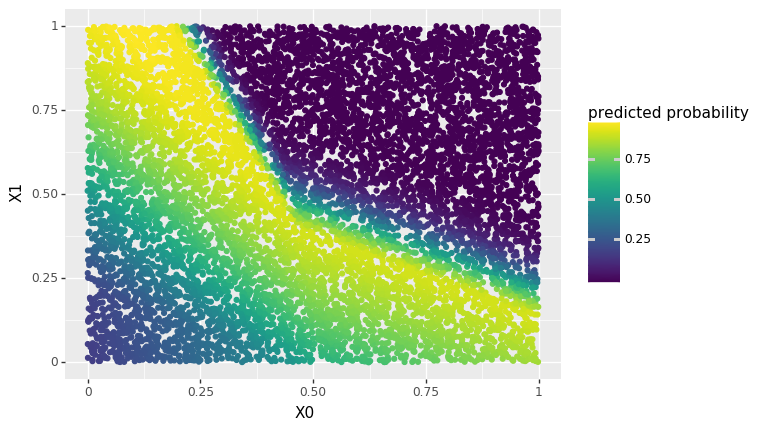

<ggplot: (-9223371912043336290)>

In [46]:
plot_proba(model3)

**3.3**

Combination of ReLu and Sigmoid activation

In [47]:
model4 = keras.Sequential()
model4.add(keras.layers.Dense(3, input_dim = 2, activation = 'relu'))
model4.add(keras.layers.Dense(3, activation = 'sigmoid'))
model4.add(keras.layers.Dense(2, activation = 'softmax'))
opt = keras.optimizers.Adam()
model4.compile(loss = keras.losses.SparseCategoricalCrossentropy(), 
              optimizer = opt,
              metrics = [keras.metrics.SparseCategoricalAccuracy()])

In [48]:
nn4 = model4.fit(x = np.array(XOR_data[['X0','X1']]),  y= y_, 
               batch_size = 32, epochs = 100)

Train on 10000 samples
Epoch 1/100
10000/10000 [==============================] - 1s 70us/sample - loss: 0.6684 - sparse_categorical_accuracy: 0.5845
Epoch 2/100
10000/10000 [==============================] - 0s 38us/sample - loss: 0.6576 - sparse_categorical_accuracy: 0.5688
Epoch 3/100
10000/10000 [==============================] - 0s 40us/sample - loss: 0.6451 - sparse_categorical_accuracy: 0.5487
Epoch 4/100
10000/10000 [==============================] - 0s 37us/sample - loss: 0.6277 - sparse_categorical_accuracy: 0.5985
Epoch 5/100
10000/10000 [==============================] - 0s 36us/sample - loss: 0.6056 - sparse_categorical_accuracy: 0.6451
Epoch 6/100
10000/10000 [==============================] - 0s 41us/sample - loss: 0.5763 - sparse_categorical_accuracy: 0.6705
Epoch 7/100
10000/10000 [==============================] - 0s 47us/sample - loss: 0.5428 - sparse_categorical_accuracy: 0.7056
Epoch 8/100
10000/10000 [==============================] - 0s 47us/sample - loss: 0.5137

10000/10000 [==============================] - 0s 40us/sample - loss: 0.4014 - sparse_categorical_accuracy: 0.8084
Epoch 65/100
10000/10000 [==============================] - 0s 36us/sample - loss: 0.4013 - sparse_categorical_accuracy: 0.8079
Epoch 66/100
10000/10000 [==============================] - 0s 36us/sample - loss: 0.4011 - sparse_categorical_accuracy: 0.8075
Epoch 67/100
10000/10000 [==============================] - 0s 38us/sample - loss: 0.4009 - sparse_categorical_accuracy: 0.8092
Epoch 68/100
10000/10000 [==============================] - 0s 36us/sample - loss: 0.4008 - sparse_categorical_accuracy: 0.8078
Epoch 69/100
10000/10000 [==============================] - 0s 35us/sample - loss: 0.4008 - sparse_categorical_accuracy: 0.8085
Epoch 70/100
10000/10000 [==============================] - 0s 37us/sample - loss: 0.4003 - sparse_categorical_accuracy: 0.8090
Epoch 71/100
10000/10000 [==============================] - 0s 35us/sample - loss: 0.4004 - sparse_categorical_accura

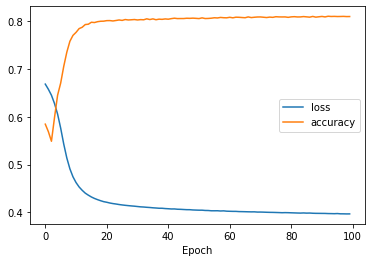

In [49]:
plot_history(nn4)

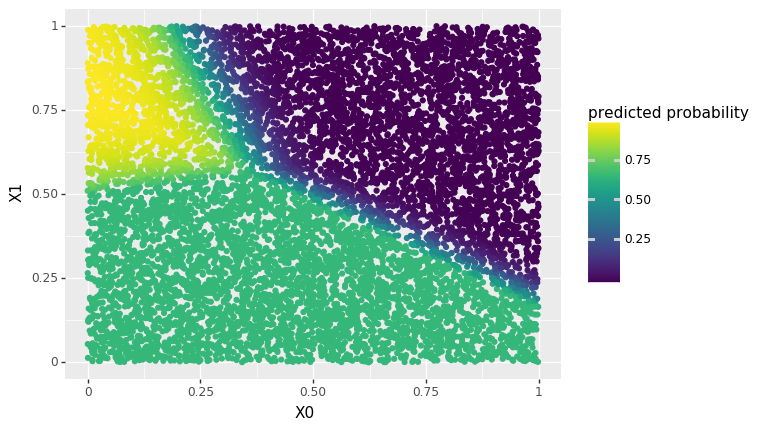

<ggplot: (124820081889)>

In [50]:
plot_proba(model4)

Sigmoid activation with 2 hidden layers and 3 units each

In [51]:
model5 = keras.Sequential()
model5.add(keras.layers.Dense(3, input_dim = 2, activation = 'sigmoid'))
model5.add(keras.layers.Dense(3, activation = 'sigmoid'))
model5.add(keras.layers.Dense(2, activation = 'softmax'))
opt = keras.optimizers.Adam()
model5.compile(loss = keras.losses.SparseCategoricalCrossentropy(), 
              optimizer = opt,
              metrics = [keras.metrics.SparseCategoricalAccuracy()])

In [52]:
nn5 = model5.fit(x = np.array(XOR_data[['X0','X1']]),  y= y_, 
               batch_size = 32, epochs = 100)

Train on 10000 samples
Epoch 1/100
10000/10000 [==============================] - 1s 84us/sample - loss: 0.6821 - sparse_categorical_accuracy: 0.5782
Epoch 2/100
10000/10000 [==============================] - 0s 38us/sample - loss: 0.6812 - sparse_categorical_accuracy: 0.5782
Epoch 3/100
10000/10000 [==============================] - 0s 37us/sample - loss: 0.6801 - sparse_categorical_accuracy: 0.5782
Epoch 4/100
10000/10000 [==============================] - 0s 40us/sample - loss: 0.6785 - sparse_categorical_accuracy: 0.5782
Epoch 5/100
10000/10000 [==============================] - 0s 38us/sample - loss: 0.6765 - sparse_categorical_accuracy: 0.5782
Epoch 6/100
10000/10000 [==============================] - 0s 40us/sample - loss: 0.6734 - sparse_categorical_accuracy: 0.5782
Epoch 7/100
10000/10000 [==============================] - 0s 39us/sample - loss: 0.6681 - sparse_categorical_accuracy: 0.5782
Epoch 8/100
10000/10000 [==============================] - 0s 39us/sample - loss: 0.6600

10000/10000 [==============================] - 0s 37us/sample - loss: 0.4695 - sparse_categorical_accuracy: 0.7682
Epoch 65/100
10000/10000 [==============================] - 0s 39us/sample - loss: 0.4690 - sparse_categorical_accuracy: 0.7680
Epoch 66/100
10000/10000 [==============================] - 0s 40us/sample - loss: 0.4685 - sparse_categorical_accuracy: 0.7687
Epoch 67/100
10000/10000 [==============================] - 0s 40us/sample - loss: 0.4680 - sparse_categorical_accuracy: 0.7680
Epoch 68/100
10000/10000 [==============================] - 0s 39us/sample - loss: 0.4674 - sparse_categorical_accuracy: 0.7694
Epoch 69/100
10000/10000 [==============================] - 0s 37us/sample - loss: 0.4670 - sparse_categorical_accuracy: 0.7693
Epoch 70/100
10000/10000 [==============================] - 0s 36us/sample - loss: 0.4665 - sparse_categorical_accuracy: 0.7690
Epoch 71/100
10000/10000 [==============================] - 0s 38us/sample - loss: 0.4661 - sparse_categorical_accura

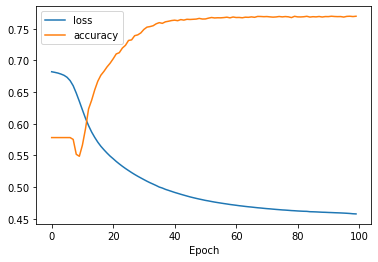

In [53]:
plot_history(nn5)

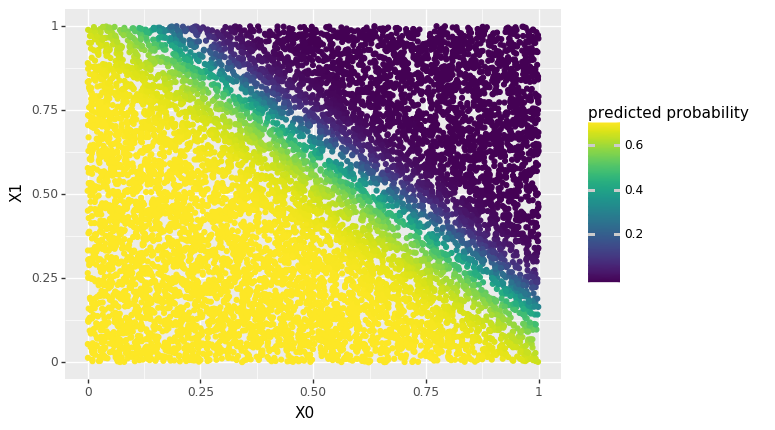

<ggplot: (124809520760)>

In [54]:
plot_proba(model5)

__Exercise 4__ (60 pts)


Load the housing.csv dataset, your task is to predict the Sale price.  Deal with the missing data by simple imputation and by creating missingness indicator variables.  Train random forests, gradient tree boosting (XGBoost), K-nearest neighbors, and kernel SVMs.  Also, train a multilayer perceptron as in exercise 3, with multiple choices of depth, width, and activation functions. Tune hyperparameters with appropriate cross-validation and compare on test sets.

4.

3-fold cross validations are applied to select the best parameters for each model. According to the R^2 scores on the test set, random forests is the best.

In [55]:
housing = pd.read_csv('housing.csv')

In [56]:
housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [57]:
housing.shape

(1460, 81)

In [58]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [59]:
# For categorical variables, create a new category 'Unknown' to replace the missing
housing_obj = housing.select_dtypes(include = 'object')
housing_obj = housing_obj.fillna('Unknown')
# get dummy variables
housing_obj = pd.get_dummies(housing_obj)

In [60]:
from sklearn.impute import SimpleImputer

In [61]:
# simple imputer for numerical variables
housing_num = housing.iloc[:,0:-1].select_dtypes(include = np.number)
imp = SimpleImputer(strategy='median')
housing_num = pd.DataFrame(imp.fit_transform(housing_num), columns=housing_num.columns)

In [62]:
X = pd.concat([housing_num, housing_obj], axis=1)
y = housing['SalePrice']

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)

In [65]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

Random Forest

In [257]:
n_estimators = [10, 100, 1000]
max_features = ['auto', 'sqrt', 'log2']
hyperpara = dict(n_estimators = n_estimators, max_features = max_features)
rf = RandomForestRegressor()
grid1 = GridSearchCV(rf, hyperpara, cv = 3, n_jobs=-1)
rf_best = grid1.fit(X_train, y_train)

In [274]:
rf_best.best_estimator_.score(X_test, y_test)

0.8013573927757324

Gradient tree boosting 

In [259]:
n_estimators = [10, 100, 500]
learning_rate = [0.05, 0.1, 1, 2]
criterion = ['friedman_mse', 'mse', 'mae']
hyperpara = dict(n_estimators = n_estimators, learning_rate = learning_rate, criterion = criterion)
xgb = GradientBoostingRegressor()
grid2 = GridSearchCV(xgb, hyperpara, cv = 3, n_jobs=-1)
xgb_best = grid2.fit(X_train, y_train)

In [276]:
xgb_best.best_estimator_.score(X_test, y_test)

0.7361577293978702

K-nearest neighbors

In [263]:
n_neighbors = [3, 5, 7, 10, 15, 20]
weights = ['uniform', 'distance']
hyperpara = dict(n_neighbors = n_neighbors, weights = weights)
knn = KNeighborsRegressor()
grid3 = GridSearchCV(knn, hyperpara, cv = 3, n_jobs=-1)
knn_best = grid3.fit(X_train, y_train)

In [277]:
knn_best.best_estimator_.score(X_test, y_test)

0.704034354867239

Kernel SVMs

In [265]:
kernel=['linear','poly','rbf','sigmoid']
C = [1, 2, 5, 10]
hyperpara = dict(kernel = kernel, C = C)
svm = SVR()
grid4 = GridSearchCV(svm, hyperpara, cv = 3, n_jobs=-1)
svm_best = grid4.fit(X_train, y_train)

In [278]:
svm_best.best_estimator_.score(X_test, y_test)

0.7045255004536763

multilayer perceptron

In [90]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, input_dim = 305, activation = 'sigmoid'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(1))
opt = keras.optimizers.Adam()
model.compile(loss = keras.losses.MeanSquaredError(), 
               optimizer = opt)

In [91]:
nn = model.fit(np.array(X_train), np.array(y_train),
               batch_size = 10, epochs = 250)

Train on 978 samples
Epoch 1/250
978/978 [==============================] - 1s 517us/sample - loss: 38523633546.7321
Epoch 2/250
978/978 [==============================] - 0s 204us/sample - loss: 38443703448.8671
Epoch 3/250
978/978 [==============================] - 0s 190us/sample - loss: 38258163209.4233
Epoch 4/250
978/978 [==============================] - 0s 200us/sample - loss: 37960092154.7648
Epoch 5/250
978/978 [==============================] - 0s 193us/sample - loss: 37556468067.9918
Epoch 6/250
978/978 [==============================] - 0s 195us/sample - loss: 37060384621.4151
Epoch 7/250
978/978 [==============================] - 0s 197us/sample - loss: 36481915740.6626
Epoch 8/250
978/978 [==============================] - 0s 219us/sample - loss: 35822342795.2556
Epoch 9/250
978/978 [==============================] - 0s 190us/sample - loss: 35088366646.4458
Epoch 10/250
978/978 [==============================] - 0s 196us/sample - loss: 34293059334.8057
Epoch 11/250
978/9

978/978 [==============================] - 0s 197us/sample - loss: 2155199060.7198
Epoch 86/250
978/978 [==============================] - 0s 196us/sample - loss: 2112823652.4949
Epoch 87/250
978/978 [==============================] - 0s 197us/sample - loss: 2069442738.2004
Epoch 88/250
978/978 [==============================] - 0s 203us/sample - loss: 2025605257.4340
Epoch 89/250
978/978 [==============================] - 0s 190us/sample - loss: 1981594183.2065
Epoch 90/250
978/978 [==============================] - 0s 244us/sample - loss: 1937405809.9632
Epoch 91/250
978/978 [==============================] - 0s 182us/sample - loss: 1898911060.9407
Epoch 92/250
978/978 [==============================] - 0s 254us/sample - loss: 1860447262.6115
Epoch 93/250
978/978 [==============================] - 0s 186us/sample - loss: 1823438902.8323
Epoch 94/250
978/978 [==============================] - 0s 184us/sample - loss: 1788189586.6626
Epoch 95/250
978/978 [==============================]

978/978 [==============================] - 0s 176us/sample - loss: 634864774.8461
Epoch 171/250
978/978 [==============================] - 0s 178us/sample - loss: 630442670.6385
Epoch 172/250
978/978 [==============================] - 0s 223us/sample - loss: 625274942.5164
Epoch 173/250
978/978 [==============================] - 0s 230us/sample - loss: 621316571.0107
Epoch 174/250
978/978 [==============================] - 0s 219us/sample - loss: 617695497.0256
Epoch 175/250
978/978 [==============================] - 0s 178us/sample - loss: 613547515.2924
Epoch 176/250
978/978 [==============================] - 0s 177us/sample - loss: 609268178.4417
Epoch 177/250
978/978 [==============================] - 0s 186us/sample - loss: 605821977.0565
Epoch 178/250
978/978 [==============================] - 0s 184us/sample - loss: 602471687.8310
Epoch 179/250
978/978 [==============================] - 0s 201us/sample - loss: 599505681.5363
Epoch 180/250
978/978 [==============================]

Text(0.5, 0, 'Epoch')

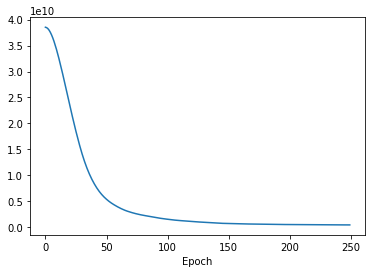

In [92]:
plt.plot(nn.history['loss'], label = 'loss')
plt.xlabel('Epoch')

In [93]:
from sklearn.metrics import r2_score

In [94]:
r2_score(y_test, model.predict(X_test))

0.7606898093422116